# Introduce Graphing w/ Notebooks

In [1]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import math

import sys
import os

from __future__ import division

In [2]:
def GraphIt(V, E, w={}, D=True, C={}):
    'Plots a graph'
    G = gv.Digraph(filename='graph', format='png') if D else gv.Graph(filename='graph', format='png')
        
    for v in V:
        G.node(str(v))
    for u in E:
        for v in E.get(u, []):
            if not D and u>v: continue
            if (u,v) in C or ((v,u) in C and not D):
                G.edge(str(u),str(v), label = str(w.get((u,v), '')), color='blue')
            else:
                G.edge(str(u),str(v), label = str(w.get((u,v), '')))
    G.render()
    img=mpimg.imread('graph.png')

    fig, ax = plt.subplots(frameon=False)
    fig.set_size_inches(7,7)
    imgplot = plt.imshow(img)

    ax.axis('off')
    plt.box(on=None) 
    plt.show()  
    print "Vertex: Edge List"
    for u in V:
        print u, ": ", E.get(u, [])

In [3]:
def RandomEdgePermute(N, p, selfE=False, D=True):
    V = range(1,N+1)
    Elist = [(u,v) for u in range(1,N+1) for v in range(1,N+1) if (u!=v or selfE) and (u<v or D)]
    random.shuffle(Elist)
    E = {}
    for i in range(int(p*len(Elist))):
        u, v = Elist[i]
        e = E.get(u,[])
        e.append(v)
        e.sort()
        E[u] = e
        if not D:
            e = E.get(v,[])
            e.append(u)
            e.sort()
            E[v] = e
    return V, E

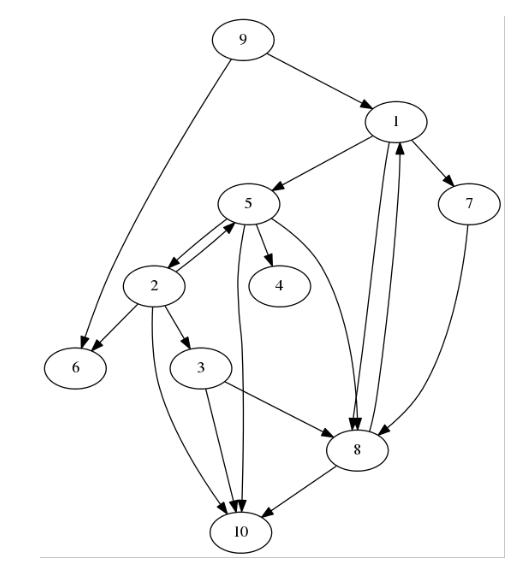

Vertex: Edge List
1 :  [5, 7, 8]
2 :  [3, 5, 6, 10]
3 :  [8, 10]
4 :  []
5 :  [2, 4, 8, 10]
6 :  []
7 :  [8]
8 :  [1, 10]
9 :  [1, 6]
10 :  []


In [4]:
V, E = RandomEdgePermute(10, 0.2)
GraphIt(V, E)

In [5]:
def WriteGraph(V,E, filename):
    f = open(filename, 'w')
    for u in E:
        for v in E.get(u, []):
            f.write(str(u) + " " + str(v) + os.linesep)
    f.close()

def ReadGraph(N, filename):
    V = range(1,N+1)
    E = {}
    f = open(filename)
    for line in f:
        l = [int(i) for i in line.strip().split(" ")]
        e = E.get(l[0],[])
        e.append(l[1])
        e.sort()
        E[l[0]] = e
    return V, E

In [6]:
gf = "graph5.txt"
WriteGraph(V, E, gf)
with open(gf) as f:
    print f.read()


1 5
1 7
1 8
2 3
2 5
2 6
2 10
3 8
3 10
5 2
5 4
5 8
5 10
7 8
8 1
8 10
9 1
9 6



{1: [9, 10], 2: [5, 6], 3: [4, 5], 4: [5, 8, 9], 5: [1], 6: [10], 7: [9], 8: [1, 2], 9: [7], 10: [3, 5, 7]}


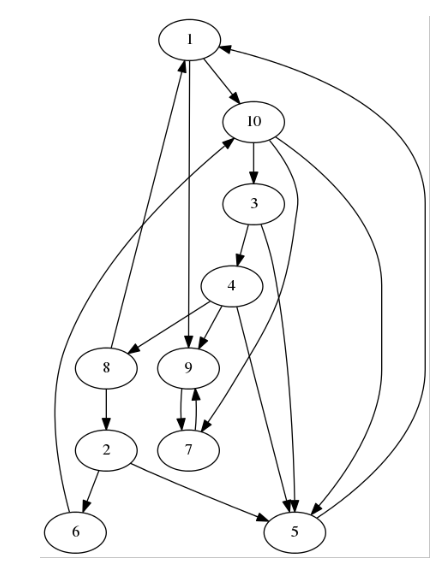

Vertex: Edge List
1 :  [9, 10]
2 :  [5, 6]
3 :  [4, 5]
4 :  [5, 8, 9]
5 :  [1]
6 :  [10]
7 :  [9]
8 :  [1, 2]
9 :  [7]
10 :  [3, 5, 7]


In [7]:
gf = "graph1.txt"
V, E = ReadGraph(10, gf)
print E
GraphIt(V, E)

# BFS and DFS results

In [8]:
from graphs import *

ImportError: No module named graphs

In [ ]:
c, d, p = BFS(V, E, 1)
print "Vertex: Distance [Path]"
for u in d:
    print u,": ", d[u], Path(p, u)

In [ ]:
DFS(V,E)

for u in DISCOVER:
    print 'Discover/Finish: ', u, ':', DISCOVER[u], FINISH[u]
    
tree = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Tree']
back = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Back']
forward = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Forward']
cross = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Cross']

tree.sort()
back.sort()
forward.sort()
cross.sort()
print 'Tree: ', tree
print 'Back: ', back
print 'Forward: ', forward
print 'Cross: ', cross
print "Vertices in Topological Order: ",   [x[1] for x in sorted([(FINISH[u],u) for u in FINISH],
                                                                 reverse=True, key=lambda x: x[0])]


# Weighted Undirected Graph

In [ ]:
def EdgeList(V, E):
    l = []
    for u in V:
        e = E.get(u, [])
        for v in  e:
            l.append((u,v))
    return l

def GenWeights(V, E, low, high, D=True):
    w = {}
    l = EdgeList(V, E)
    for e in l:
        w[e] = random.randint(low, high)
    if not D:
        for u,v in w:
            if u>v:
                w[(u,v)] = w[(v,u)]
    return w

V, E = RandomEdgePermute(10, 0.4, False, False)
print EdgeList(V, E)
W = GenWeights(V, E, 1, 5, False)
GraphIt(V, E, W, False)

# MST w/ Kruskal

In [ ]:
# Union Find
def EdgeList(V, E):
    l = []
    for u in V:
        e = E.get(u, [])
        for v in  e:
            l.append((u,v))
    return l

class DSet(object):
    def __str__(self):
        return str(self.v)

def MakeSet(x):
    sx = DSet()
    sx.v = x
    sx.p = sx
    sx.rank = 0
    return sx

def Union(x, y):
    Link(FindSet(x), FindSet(y) )

def Link(x, y):
    if x.rank > y.rank:
        y.p = x
    else:
        x.p = y
        if x.rank == y.rank:
            y.rank = y.rank + 1

def FindSet(x):
    if x!=x.p:
        x.p = FindSet(x.p)
    return x.p
    
def Kruskal(V, E, W):
    A = []
    Vset = {}
    for v in V:
        Vset[v] = MakeSet(v)
    eList = [(W[e], e) for e in EdgeList(V, E)]
    eList.sort()
    for w, (u,v) in eList:
        if FindSet(Vset[u]) != FindSet(Vset[v]):
            A.append( (u,v) )
            Union( Vset[u], Vset[v] )
    return A


In [ ]:
#from kruskal import *

A = Kruskal(V, E, W)
A.sort()
print A, np.sum([W[e] for e in A])
GraphIt(V, E, W, False, A)
AKruskal = A

# Prim w/ MinHeap

In [ ]:
class Vertex:
    def __repr__(self):
        return str(self.v)+ ":"+ str(self.key) + "/"+ str(self.pos)
    
Parent = lambda i: int(i/2)
Left = lambda i: 2*i
Right = lambda i: 2*i + 1
HeapEmpty = lambda Q: len(Q)==1

def MinHeap():
    a = Vertex()
    a.v = -1
    a.key = -1
    a.pos = 0
    Q = [a]
    return Q

def MinHeapInsert(A, v):
    A.append(v)
    v.pos = len(A)-1
    key = v.key
    v.key = sys.maxint
    HeapDecreaseKey(A, len(A)-1, key)
    
def HeapDecreaseKey(A, i, key):
    if key > A[i].key:
        raise Exception("HeapDecreaseKey: New key is larger")
    else:
        A[i].key = key
        while i>1: 
            if A[Parent(i)].key<A[i].key or (A[Parent(i)].key==A[i].key and A[Parent(i)].v<A[i].v): break
            A[i], A[Parent(i)] = A[Parent(i)], A[i]
            A[i].pos = i
            A[Parent(i)].pos = Parent(i)
            i = Parent(i)

def HeapExtractMin(A):
    if not A:
        raise Exception("HeapExtractMin: Empty Heap")
    else:
        minV = A[1]
        x = A.pop()
        if len(A)>1:
            A[1] = x
            A[1].pos = 1
            MinHeapify(A, 1)
        return minV

def MinHeapify(A, i):
    l = Left(i)
    r = Right(i)
    if l<=len(A)-1:
        if A[l].key<A[i].key or (A[l].key==A[i].key and A[l].v<A[i].v): 
            smallest = l
        else:
            smallest = i
    else:
        smallest = i
    if r<=len(A)-1:
        if A[r].key<A[smallest].key or (A[r].key==A[smallest].key and A[r].v<A[smallest].v): 
            smallest = r
    if smallest != i:
        A[i], A[smallest] = A[smallest], A[i]
        A[smallest].pos = smallest
        A[i].pos = i
        MinHeapify(A, smallest)

In [ ]:
def MST_Prim(V, E, w, r):
    Q=MinHeap()
    vSet = {}
    aSet=[]
    for u in V:
        xU = Vertex()
        xU.v = u
        xU.key = sys.maxint
        xU.parent = 0
        vSet[u] = xU
        MinHeapInsert(Q, xU)
    HeapDecreaseKey(Q, vSet[r].pos, 0)
    while not HeapEmpty(Q):
        u = HeapExtractMin(Q)
        vSet.pop(u.v,0)
        e = E.get(u.v,[])
        aSet.append(u)
        for v in e:
            if v not in vSet: continue
            if w[(u.v, v)] < vSet[v].key:
                vSet[v].parent = u
                vSet[v].key = w[(u.v, v)]
                HeapDecreaseKey(Q, vSet[v].pos, vSet[v].key)
    A = [(u.v, u.parent.v) if u.v < u.parent.v else (u.parent.v, u.v) for u in aSet if u.v != r]
    return A

In [ ]:
APrim = MST_Prim(V, E, W, 1)
APrim.sort()
print APrim, np.sum([W[e] for e in APrim])
GraphIt(V, E, W, False, APrim)

# Kruskal / Prim Results

In [ ]:
print "Kruskal: ", sorted([(e, W[e]) for e in AKruskal],key=lambda x:x[1]), np.sum([W[e] for e in AKruskal])
print "Prim: ", sorted([(e, W[e]) for e in APrim],key=lambda x:x[1]), np.sum([W[e] for e in APrim])